### Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\wine+quality\winequality-red.csv',sep=';') # Gathering data
red_wine.isnull()
red_wine.columns = red_wine.columns.str.replace(" ", "_")
red_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [4]:
print(red_wine.isna().sum().sum())

0


In [5]:
red_wine_low=red_wine[red_wine['quality_label'] != 'high']
red_wine_high=red_wine[red_wine['quality_label'] == 'high']

red_wine_low2 = red_wine_low[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]
red_wine_high2 = red_wine_high[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]

In [6]:
red_wine_low.shape[0]

1581

In [7]:
red_wine_high.shape[0]

18

In [8]:
red_wine_high2.shape[0]

18

In [9]:
red_wine_low2.shape[0]

1581

In [10]:
red_wine_low2.head(100)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.700
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0.880
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0.760
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0.280
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.9,0.058,0.17,0.9932,4.7,17.0,3.85,6,2.3,0.60,106.0,0.600
96,10.7,0.102,0.00,0.9965,6.8,8.0,3.45,5,3.0,0.56,23.0,0.775
97,9.2,0.070,0.25,0.9963,7.0,3.0,3.25,5,2.0,0.63,22.0,0.500
98,9.8,0.079,0.06,0.9967,7.6,5.0,3.39,5,2.5,0.56,10.0,0.900


### Low Red Wine

In [11]:
df = pd.DataFrame(red_wine_low2)

# Function to replace outliers with the mean using IQR method
def replace_outliers_with_mean(df):
    # For each column in the DataFrame
    for column in df.select_dtypes(include=['float64', 'int64']).columns: 
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier cutoff values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the mean of the column
        mean_value = df[column].mean()

        # Replace outliers with the mean value
        df[column] = df[column].apply(lambda x: mean_value if (x < lower_bound or x > upper_bound) else x)

    return df

# Replace outliers with mean
red_low_cleaned = replace_outliers_with_mean(df)

print("Original Data:")
print(df)
print("\nCleaned Data (Outliers Replaced with Mean):")
print(red_low_cleaned)


Original Data:
      alcohol  chlorides  citric_acid  density  fixed_acidity  \
0         9.4      0.076         0.00  0.99780            7.4   
1         9.8      0.098         0.00  0.99680            7.8   
2         9.8      0.092         0.04  0.99700            7.8   
3         9.8      0.075         0.56  0.99800           11.2   
4         9.4      0.076         0.00  0.99780            7.4   
...       ...        ...          ...      ...            ...   
1594     10.5      0.090         0.08  0.99490            6.2   
1595     11.2      0.062         0.10  0.99512            5.9   
1596     11.0      0.076         0.13  0.99574            6.3   
1597     10.2      0.075         0.12  0.99547            5.9   
1598     11.0      0.067         0.47  0.99549            6.0   

      free_sulfur_dioxide    pH  quality  residual_sugar  sulphates  \
0                    11.0  3.51      5.0             1.9       0.56   
1                    25.0  3.20      5.0             2.6      

In [12]:
red_low_cleaned.shape[0]

1581

<Axes: >

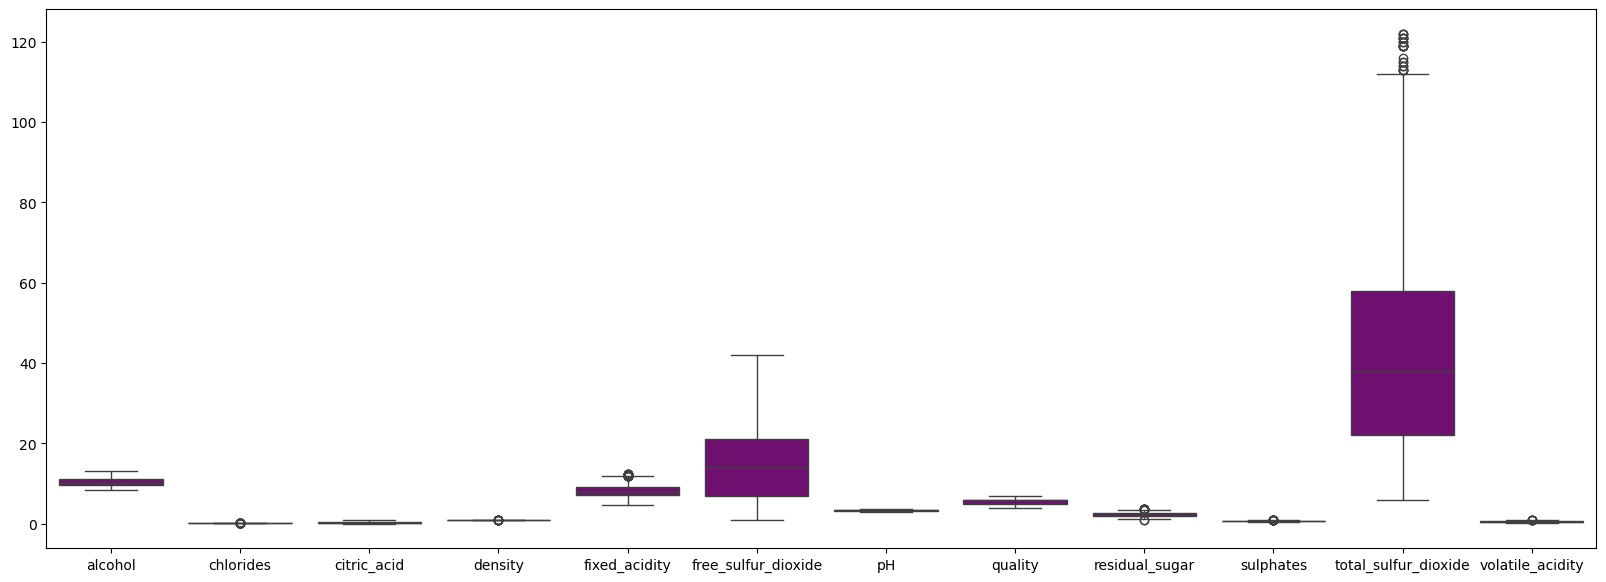

In [13]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=red_low_cleaned, color='purple')

### Scale high Quality

In [14]:
red_wine_high2.shape[0]

18

<Axes: >

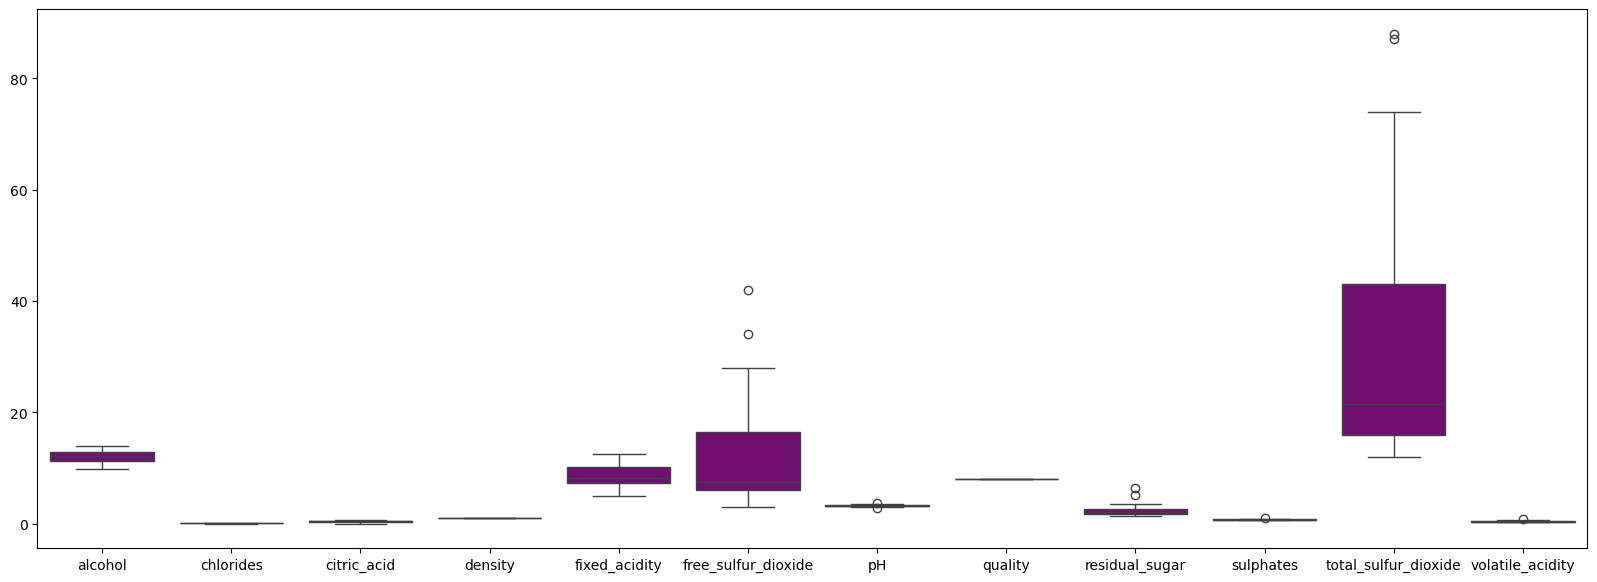

In [15]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=red_wine_high2, color='purple')


In [16]:
red_wine_high2.shape[0]

18

In [17]:
red_wine_noout = pd.concat([red_low_cleaned, red_wine_high2])
red_wine_noout.tail()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
1202,11.7,0.068,0.39,0.99516,8.6,6.0,3.35,8.0,1.8,0.69,12.0,0.42
1269,14.0,0.044,0.03,0.99080,5.5,28.0,3.50,8.0,1.8,0.82,87.0,0.49
1403,10.0,0.061,0.33,0.99600,7.2,3.0,3.23,8.0,1.7,1.10,13.0,0.33
1449,11.3,0.056,0.31,0.99472,7.2,15.0,3.23,8.0,2.0,0.76,29.0,0.38
1549,11.4,0.074,0.30,0.99419,7.4,17.0,3.24,8.0,1.8,0.70,24.0,0.36


In [18]:
red_wine_noout.shape[0]

1599

<Axes: >

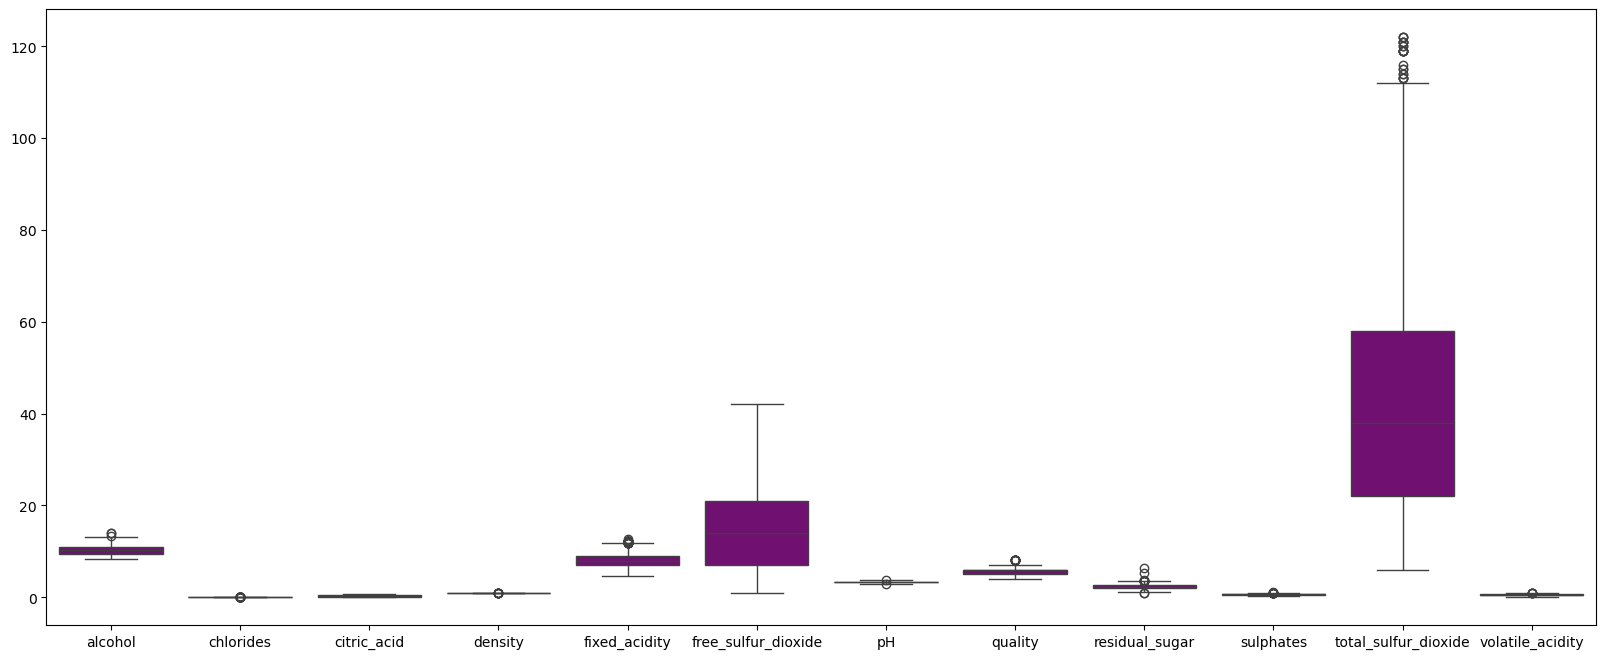

In [23]:
fig = plt.figure(figsize = (20,8))
sns.boxplot(data=red_wine_noout, color='purple')

### Normalization with MinMax Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(red_wine_noout)

<Axes: >

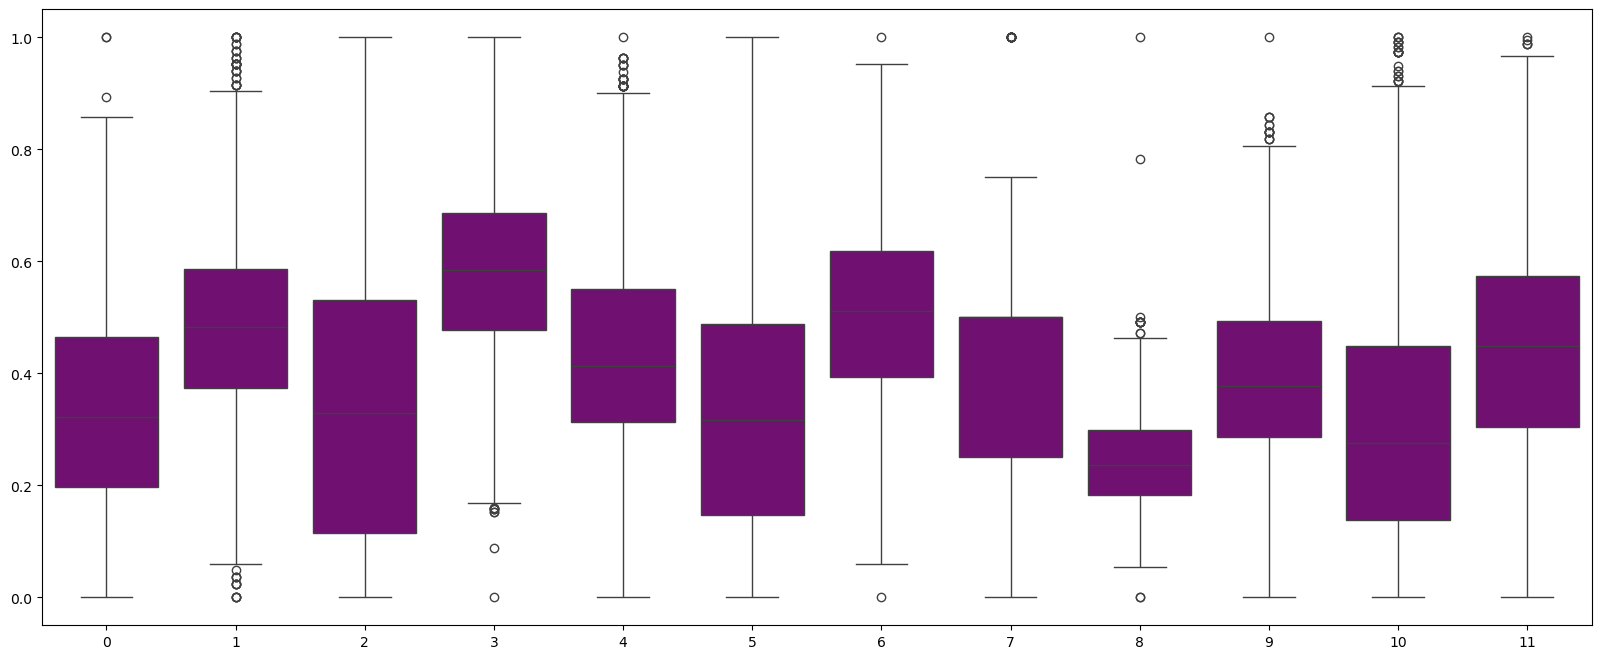

In [22]:
fig = plt.figure(figsize = (20,8))
sns.boxplot(data=data_scaled, color='purple')